In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
plt.style.use('ggplot')

In [2]:
train = pd.read_csv('data/bike.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [6]:
datetime = train['datetime']
datetime.head()

0   2011-01-01 00:00:00
1   2011-01-01 01:00:00
2   2011-01-01 02:00:00
3   2011-01-01 03:00:00
4   2011-01-01 04:00:00
Name: datetime, dtype: datetime64[ns]

In [7]:
train['year']=datetime.dt.year
train['month']=datetime.dt.month
train['day']=datetime.dt.day
train['hour']=datetime.dt.hour
train['minute']=datetime.dt.minute
train['second']=datetime.dt.second
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [ ]:
sns.barplot(data=train,x='year',y='count')

In [ ]:
sns.barplot(data=train,x='month',y='count')

In [ ]:
sns.barplot(data=train,x='day',y='count')

In [ ]:
sns.barplot(data=train,x='hour',y='count')

In [8]:
train['dayofweek']=datetime.dt.dayofweek
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0,2


In [ ]:
plt.figure(figsize=(30,10))
sns.pointplot(data=train, x="hour", y="count", hue='workingday')

In [ ]:
plt.figure(figsize=(30,10))
sns.pointplot(data=train, x="hour", y="count", hue='dayofweek')

In [ ]:
plt.figure(figsize=(30,10))
sns.pointplot(data=train, x="hour", y="count", hue='weather')

In [ ]:
plt.figure(figsize=(30,10))
sns.pointplot(data=train, x="hour", y="count", hue='season')

In [ ]:
plt.figure(figsize=(30,10))
sns.regplot(data=train, x="humidity", y="count")

In [ ]:
plt.figure(figsize=(30,10))
sns.regplot(data=train, x="windspeed", y="count")

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(30,30)
sns.heatmap(train.corr(), annot=True, cmap="RdBu_r", annot_kws={'size':20},linewidths=0.5)

In [9]:
q1 = np.percentile(train['count'],25)
q3 = np.percentile(train['count'],75)

In [10]:
iqr = q3-q1
iqr

242.0

In [11]:
train_without_liers = train[(train['count']>=q1-(1.5*iqr))&(train['count']<=q3+(1.5*iqr))]

In [12]:
print(train.shape)
print(train_without_liers.shape)

(10886, 19)
(10586, 19)


In [13]:
train=train_without_liers

In [ ]:
plt.figure(figsize=(30,10))
sns.distplot(train['count'])

C:\ai\python\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


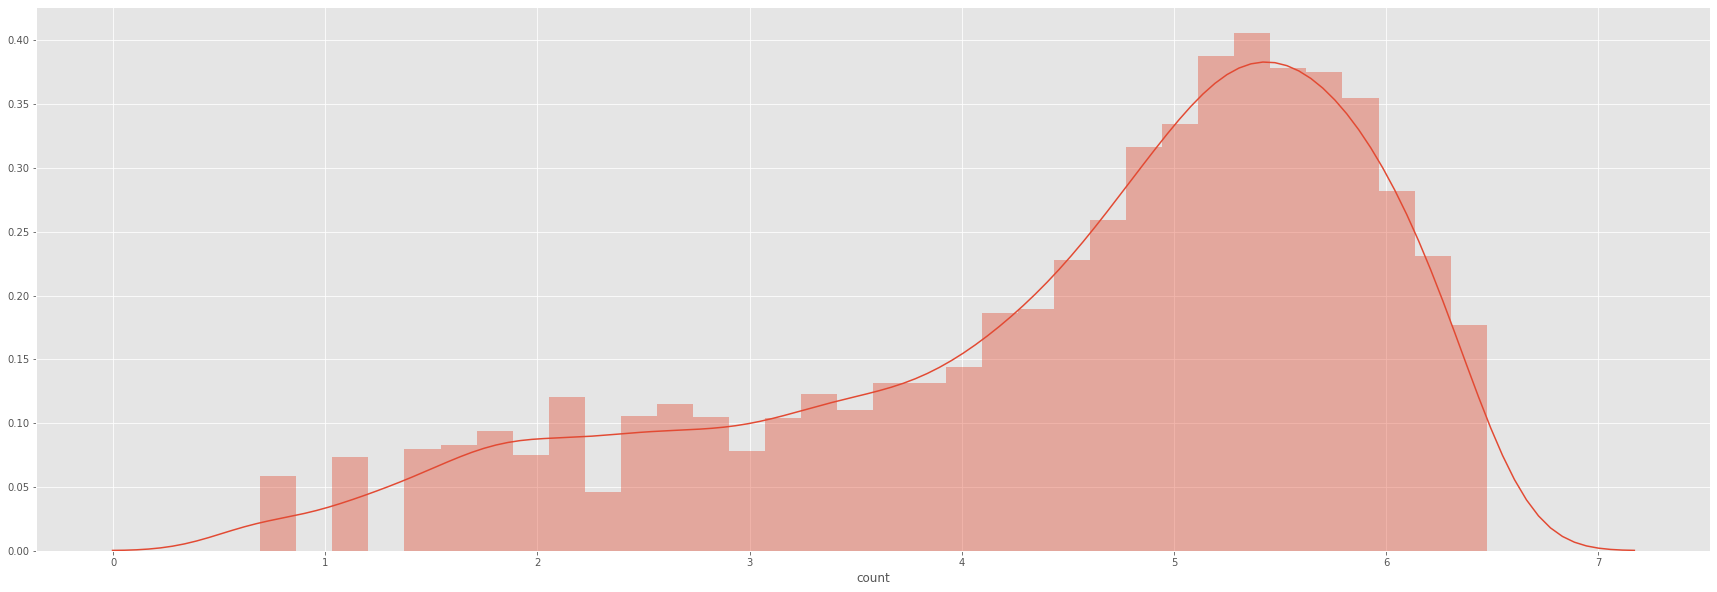

In [14]:
train['count'] = np.log1p(train['count'])
plt.figure(figsize=(30,10))
sns.distplot(train['count'])

In [15]:
train['windspeed'] = train['windspeed'].replace(0, np.nan)
train

C:\ai\python\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,NaN,3,13,2.833213,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,NaN,8,32,3.713572,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,NaN,5,27,3.496508,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,NaN,3,10,2.639057,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,NaN,0,1,0.693147,2011,1,1,4,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,5.820083,2012,12,19,19,0,0,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,5.488938,2012,12,19,20,0,0,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,5.129899,2012,12,19,21,0,0,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,4.867534,2012,12,19,22,0,0,2


In [16]:
train=train.interpolate().fillna(method='ffill',limit=10).fillna(method='bfill', limit=10)
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,6.0032,3,13,2.833213,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,6.0032,8,32,3.713572,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,6.0032,5,27,3.496508,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,6.0032,3,10,2.639057,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,6.0032,0,1,0.693147,2011,1,1,4,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,5.820083,2012,12,19,19,0,0,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,5.488938,2012,12,19,20,0,0,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,5.129899,2012,12,19,21,0,0,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,4.867534,2012,12,19,22,0,0,2


In [17]:
train.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
year          0
month         0
day           0
hour          0
minute        0
second        0
dayofweek     0
dtype: int64

In [18]:
train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,6.00320,3,13,2.833213,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,6.00320,8,32,3.713572,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,6.00320,5,27,3.496508,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,6.00320,3,10,2.639057,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,6.00320,0,1,0.693147,2011,1,1,4,0,0,5
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.00320,0,1,0.693147,2011,1,1,5,0,0,5
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,8.20214,2,0,1.098612,2011,1,1,6,0,0,5
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,10.40108,1,2,1.386294,2011,1,1,7,0,0,5
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,12.60002,1,7,2.197225,2011,1,1,8,0,0,5
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,14.79896,8,6,2.708050,2011,1,1,9,0,0,5


In [19]:
train['windspeed'].describe()

count    10586.000000
mean        13.810522
std          6.999263
min          6.003200
25%          8.388761
50%         12.998000
75%         16.997900
max         56.996900
Name: windspeed, dtype: float64

In [20]:
y=train['count']
y.head()

0    2.833213
1    3.713572
2    3.496508
3    2.639057
4    0.693147
Name: count, dtype: float64

In [21]:
X = train
X.pop('count')

0        2.833213
1        3.713572
2        3.496508
3        2.639057
4        0.693147
           ...   
10881    5.820083
10882    5.488938
10883    5.129899
10884    4.867534
10885    4.488636
Name: count, Length: 10586, dtype: float64

In [22]:
X.pop('datetime')

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10586, dtype: datetime64[ns]

In [23]:
X.pop('registered')
X.pop('day')
X.pop('minute')
X.pop('second')

0        0
1        0
2        0
3        0
4        0
        ..
10881    0
10882    0
10883    0
10884    0
10885    0
Name: second, Length: 10586, dtype: int64

In [24]:
X.pop('casual')

0         3
1         8
2         5
3         3
4         0
         ..
10881     7
10882    10
10883     4
10884    12
10885     4
Name: casual, Length: 10586, dtype: int64

In [25]:
X['no_wind'] = (X['windspeed']==0)
X['weak_wind'] = (X['windspeed']>0)&(X['windspeed']<10)
X['medium_wind'] = (X['windspeed']>=10)&(X['windspeed']<13)
X['strong_wind'] = (X['windspeed']>=13)&(X['windspeed']<17)
X['Vstrong_wind'] = (X['windspeed']>=17)

X.no_wind=X.no_wind.astype(int)
X.weak_wind=X.weak_wind.astype(int)
X.medium_wind=X.medium_wind.astype(int)
X.strong_wind=X.strong_wind.astype(int)
X.Vstrong_wind=X.Vstrong_wind.astype(int)
X

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,dayofweek,no_wind,weak_wind,medium_wind,strong_wind,Vstrong_wind
0,1,0,0,1,9.84,14.395,81,6.0032,2011,1,0,5,0,1,0,0,0
1,1,0,0,1,9.02,13.635,80,6.0032,2011,1,1,5,0,1,0,0,0
2,1,0,0,1,9.02,13.635,80,6.0032,2011,1,2,5,0,1,0,0,0
3,1,0,0,1,9.84,14.395,75,6.0032,2011,1,3,5,0,1,0,0,0
4,1,0,0,1,9.84,14.395,75,6.0032,2011,1,4,5,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,2012,12,19,2,0,0,0,0,1
10882,4,0,1,1,14.76,17.425,57,15.0013,2012,12,20,2,0,0,0,1,0
10883,4,0,1,1,13.94,15.910,61,15.0013,2012,12,21,2,0,0,0,1,0
10884,4,0,1,1,13.94,17.425,61,6.0032,2012,12,22,2,0,1,0,0,0


In [26]:
X['humidity'].describe()

count    10586.000000
mean        62.165124
std         19.231315
min          0.000000
25%         47.000000
50%         62.000000
75%         78.000000
max        100.000000
Name: humidity, dtype: float64

In [27]:
X['no_humi'] = (X['humidity']==0)
X['weak_humi'] = (X['humidity']>0)&(X['humidity']<47)
X['medium_humi'] = (X['humidity']>=47)&(X['humidity']<62)
X['strong_humi'] = (X['humidity']>=62)&(X['humidity']<78)
X['Vstrong_humi'] = (X['humidity']>=78)

X.no_humi=X.no_humi.astype(int)
X.weak_humi=X.weak_humi.astype(int)
X.medium_humi=X.medium_humi.astype(int)
X.strong_humi=X.strong_humi.astype(int)
X.Vstrong_humi=X.Vstrong_humi.astype(int)
X

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,...,no_wind,weak_wind,medium_wind,strong_wind,Vstrong_wind,no_humi,weak_humi,medium_humi,strong_humi,Vstrong_humi
0,1,0,0,1,9.84,14.395,81,6.0032,2011,1,...,0,1,0,0,0,0,0,0,0,1
1,1,0,0,1,9.02,13.635,80,6.0032,2011,1,...,0,1,0,0,0,0,0,0,0,1
2,1,0,0,1,9.02,13.635,80,6.0032,2011,1,...,0,1,0,0,0,0,0,0,0,1
3,1,0,0,1,9.84,14.395,75,6.0032,2011,1,...,0,1,0,0,0,0,0,0,1,0
4,1,0,0,1,9.84,14.395,75,6.0032,2011,1,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,2012,12,...,0,0,0,0,1,0,0,1,0,0
10882,4,0,1,1,14.76,17.425,57,15.0013,2012,12,...,0,0,0,1,0,0,0,1,0,0
10883,4,0,1,1,13.94,15.910,61,15.0013,2012,12,...,0,0,0,1,0,0,0,1,0,0
10884,4,0,1,1,13.94,17.425,61,6.0032,2012,12,...,0,1,0,0,0,0,0,1,0,0


count    10586.000000
mean        62.165124
std         19.231315
min          0.000000
25%         47.000000
50%         62.000000
75%         78.000000
max        100.000000
Name: humidity, dtype: float64

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [30]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
pred = linear_regression.predict(X_train)

In [32]:
linear_regression.score(X_train,y_train)

0.4826561258742378

In [33]:
from sklearn.metrics import mean_squared_error
print("mse : ",mean_squared_error(pred,y_train))

mse :  1.0118861500166494


In [34]:
pred = linear_regression.predict(X_test)
mean_squared_error(pred,y_test)


0.9817147383177143

In [35]:
linear_regression.score(X_test,y_test)

0.4924537853391613

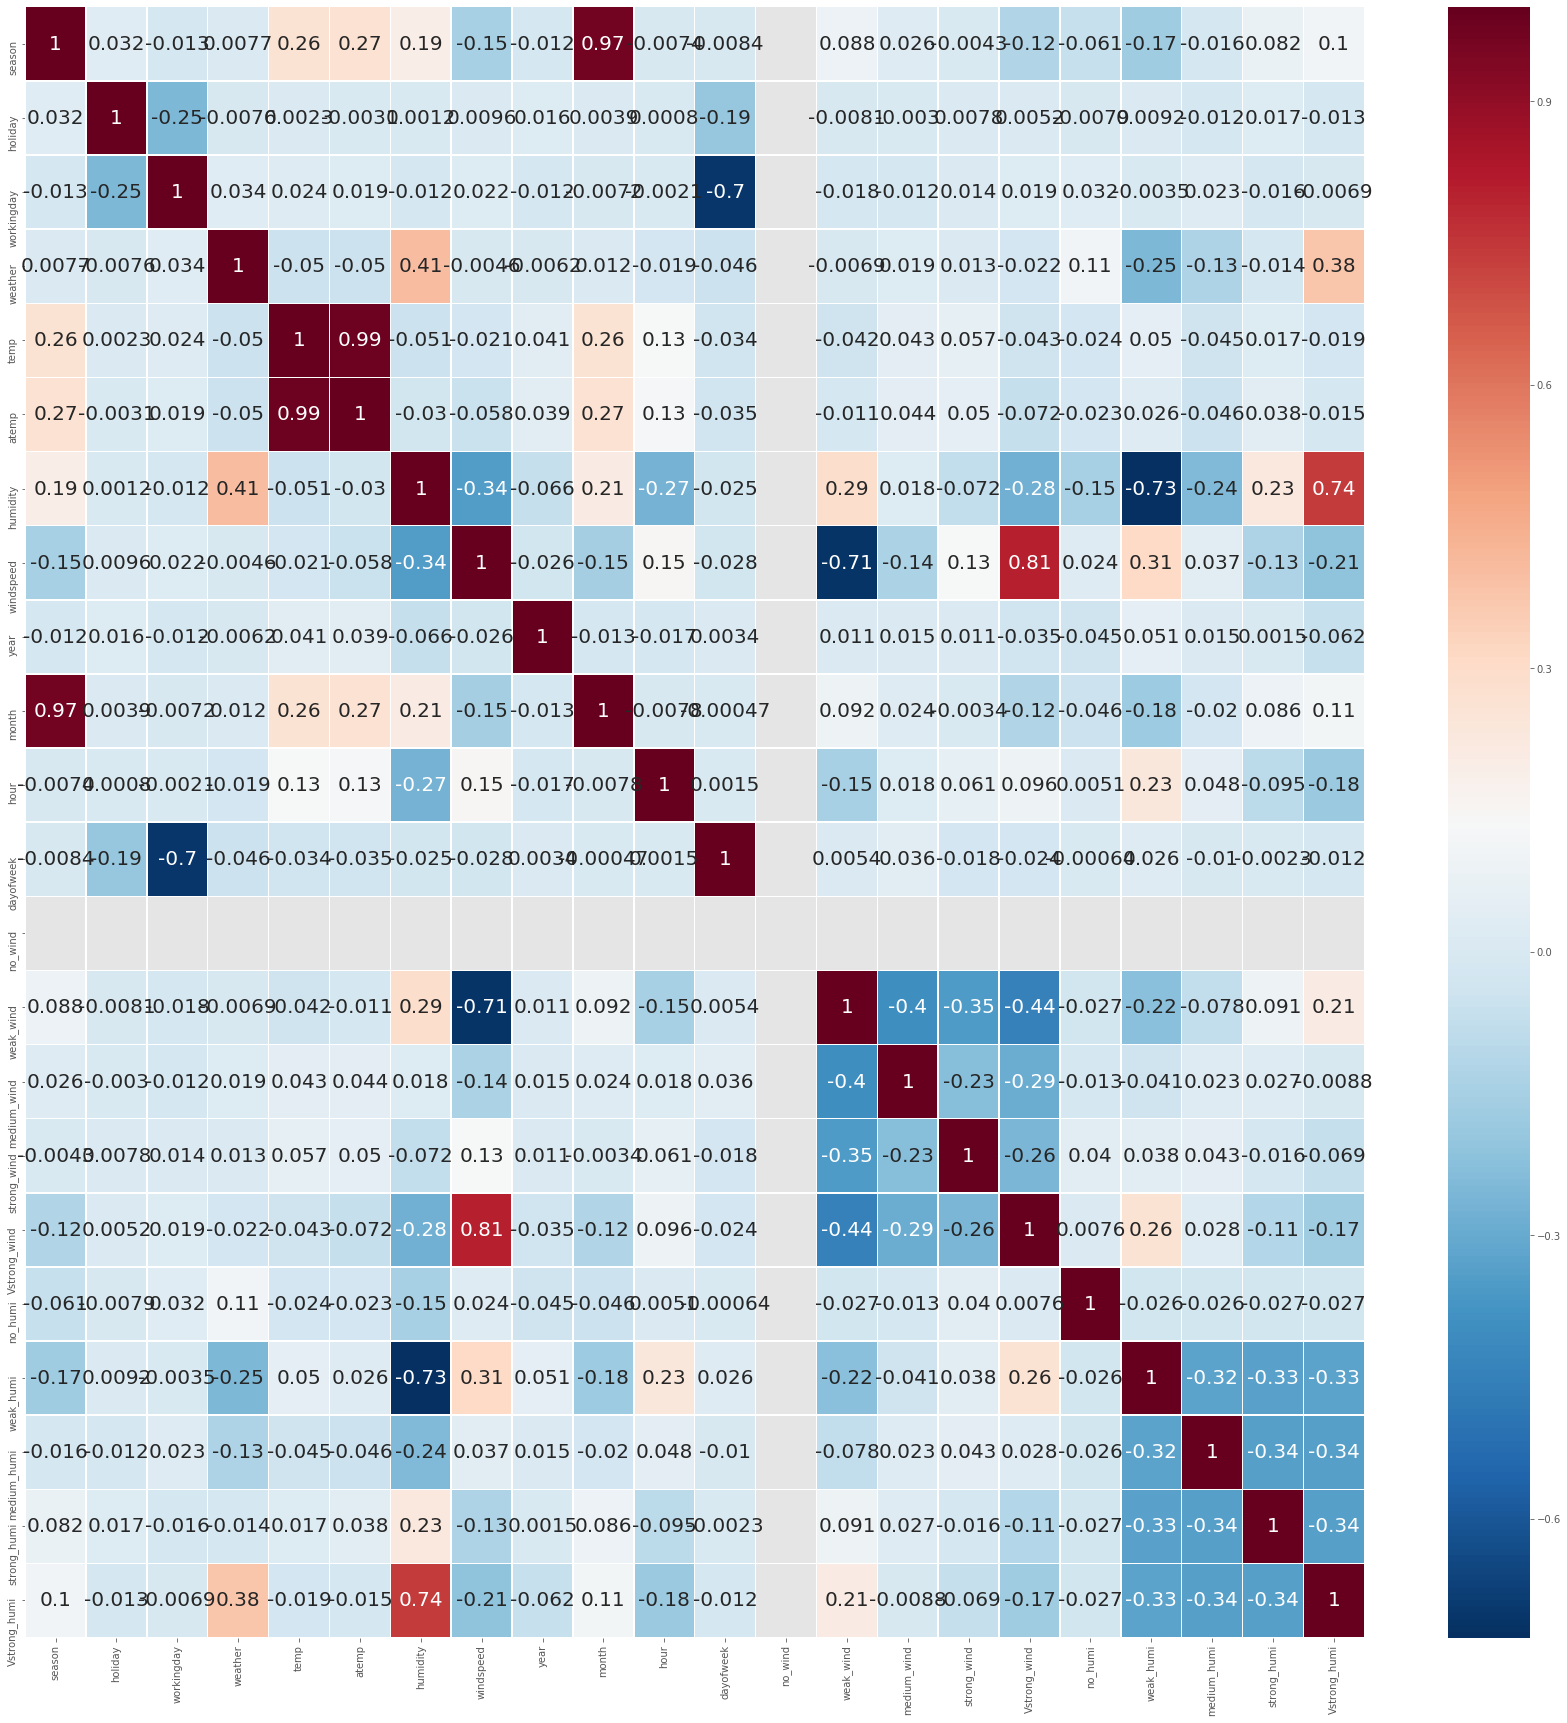

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(30,30)
sns.heatmap(train.corr(), annot=True, cmap="RdBu_r", annot_kws={'size':20},linewidths=0.5)